_____________________________

# Random Forest
created by Muhyi :
muhyifathi@gmail.com

___________________________

In [1]:
import numpy as np
import pandas as pd

In [2]:
# import data dari csv
bankloan = pd.read_csv('bankloan.csv')

In [3]:
# manmpilkan beberapa baris data awal
bankloan.head()

,age,ed,employ,address,income,debtinc,creddebt,othdebt,default
0,41,3,17,12,176,9.3,11.359392,5.008608,1
1,27,1,10,6,31,17.3,1.362202,4.000798,0
2,40,1,15,14,55,5.5,0.856075,2.168925,0
3,41,1,15,14,120,2.9,2.658720,0.821280,0
4,24,2,2,0,28,17.3,1.787436,3.056564,1


In [4]:
print("Dimensi Data : ",bankloan.shape,"\n")
print("Tipe Data :\n ",bankloan.dtypes,"\n")
print("Data Hilang :\n ",bankloan.isnull().sum())

Dimensi Data :  (700, 9) 

Tipe Data :
  age           int64
ed            int64
employ        int64
address       int64
income        int64
debtinc     float64
creddebt    float64
othdebt     float64
default       int64
dtype: object 

Data Hilang :
  age         0
ed          0
employ      0
address     0
income      0
debtinc     0
creddebt    0
othdebt     0
default     0
dtype: int64


_____________________

# EKSPLORASI DATA

______________

# Peubah Respon

In [5]:
# library untuk eksplorasi data
import matplotlib.pyplot as plt

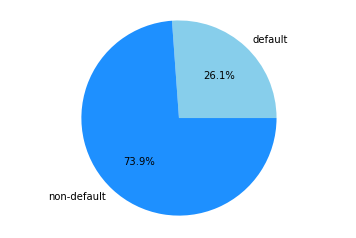

In [6]:
# menghitung ukuran diagram pie
size = [sum(bankloan['default']),
        len(bankloan['default'])-sum(bankloan['default'])]

# menentukan label
label = ['default','non-default']

# memilih warna
color = ["skyblue","dodgerblue"]

# diagram pie 
plt.pie(size,labels=label,colors=color,autopct='%1.1f%%')

plt.axis('equal')
plt.show()

# Peubah Kategorik

In [7]:
# membuat tabulasi silang untuk peubah kategorik
ed=pd.crosstab(bankloan['ed'],bankloan['default'])
ed

default,0,1
ed,,
1,293,79
2,139,59
3,57,30
4,24,14
5,4,1


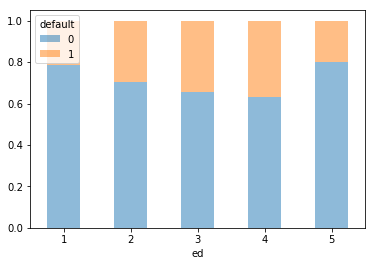

In [8]:
# membuat grafik
pd.crosstab(bankloan['ed'],bankloan['default']
            ,normalize=0).plot(kind='bar',stacked=True,alpha=0.5)

# mengatur orientasi label pada grafik
plt.xticks(rotation='horizontal')

plt.show()

# Peubah Numerik

In [9]:
# memilih peubah numerik
FITUR_NUM=list(bankloan.columns[0:1])+list(bankloan.columns[4:8])
FITUR_NUM

['age', 'income', 'debtinc', 'creddebt', 'othdebt']

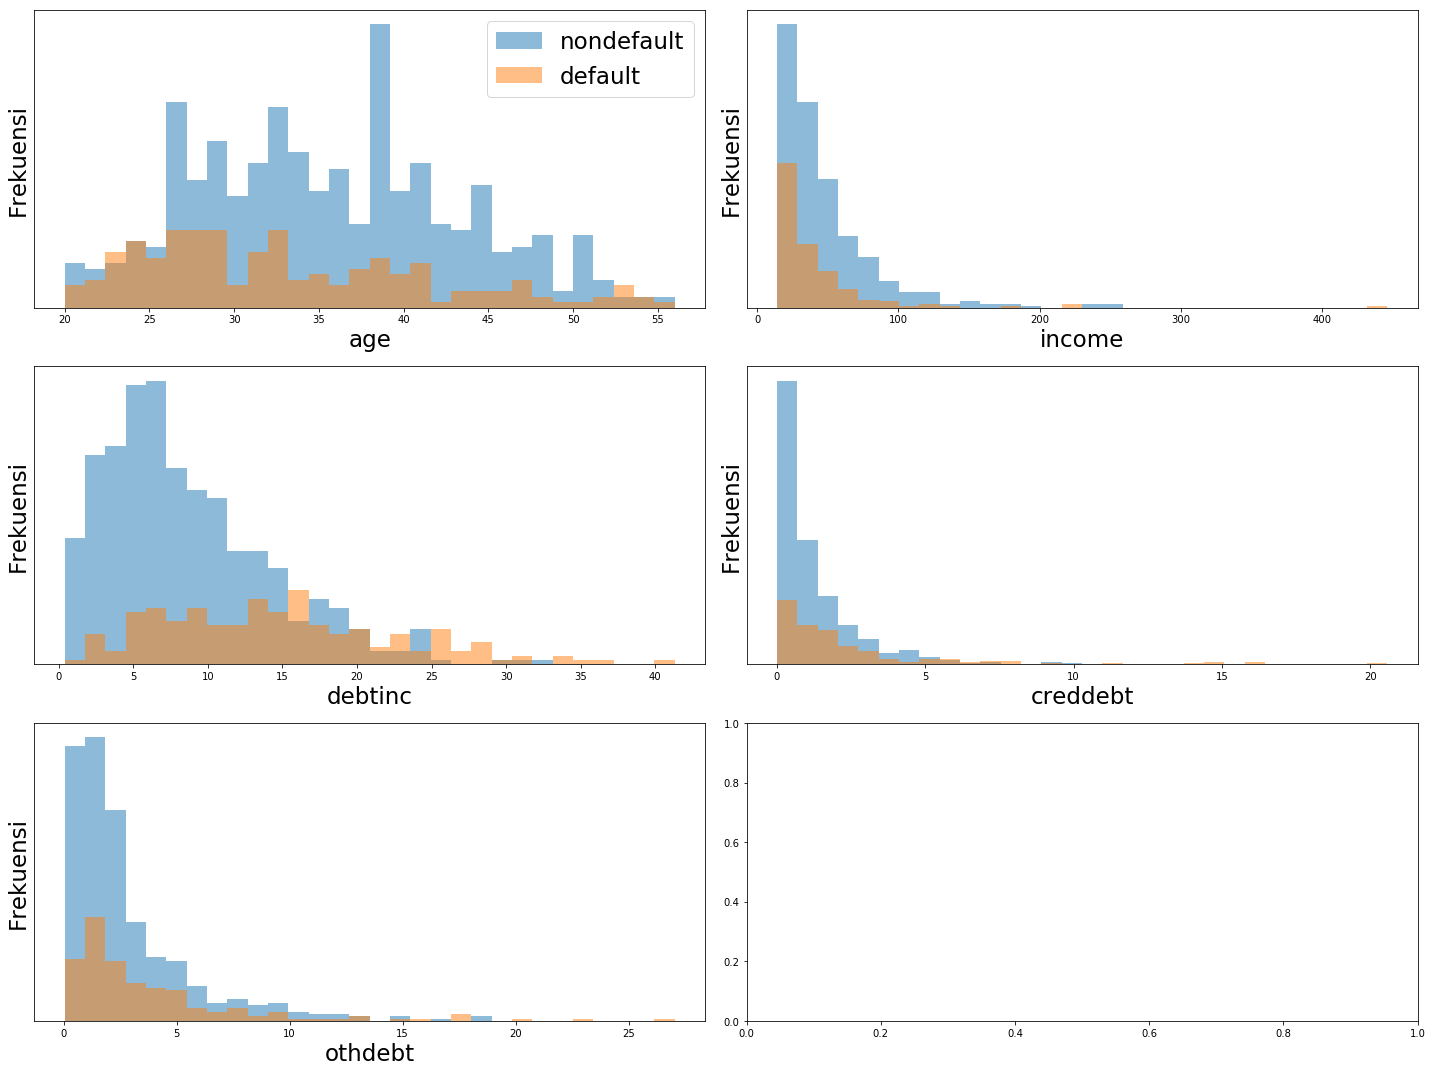

In [10]:
# membuat stacked histogram dengan looping

# menyediakan jenedla dengan ukuran tertentu
fig, axes = plt.subplots(3,2,figsize=(20,15))

# memisahkan data untuk masing masing kategori pada peubah respon
default = bankloan[bankloan['default']==1]
nondefault = bankloan[bankloan['default']==0]

# mengubah orientasi penomoran pada jendela
ax = axes.ravel()

# pembuatan gambar menggunakan looping
for i in range(len(FITUR_NUM)):
    
    # banyaknya kelas pada histogram
    _, bins = np.histogram(bankloan[FITUR_NUM[i]],bins=30)
    
    # membuat histogram kategori nondefault
    ax[i].hist(nondefault[FITUR_NUM[i]],bins=bins,alpha=0.5)
    
    # membuat histogram kategori default
    ax[i].hist(default[FITUR_NUM[i]],bins=bins,alpha=0.5)
    
    # menghilangkan skala pada sumbu y
    ax[i].set_yticks(())
    
    # manambahakn keterangan pada sumbu x
    ax[i].set_xlabel(FITUR_NUM[i],fontsize=23)
    
    # manambahakn keterangan pada sumbu x
    ax[i].set_ylabel("Frekuensi",fontsize=23)
    
    ax[i].set_title("")

# manambahkan keterangan
ax[0].legend(['nondefault','default'],loc='best',fontsize=23)

# mengatur jarak pada jendela secara otomatis
fig.tight_layout()
fig

_______________________

# PEMODELAN

______________________

# Membuat Peubah Dummy

In [11]:
print("peubah awal:\n", list(bankloan),"\n")
bankloan_dummies = pd.get_dummies(bankloan,columns=['ed'])
print("peubah setelah dummy dibuat:\n", list(bankloan_dummies),"\n")

peubah awal:
 ['age', 'ed', 'employ', 'address', 'income', 'debtinc', 'creddebt', 'othdebt', 'default'] 

peubah setelah dummy dibuat:
 ['age', 'employ', 'address', 'income', 'debtinc', 'creddebt', 'othdebt', 'default', 'ed_1', 'ed_2', 'ed_3', 'ed_4', 'ed_5'] 



In [12]:
# memilih peubah yang akan digunakan dalam pemodelan 
FITUR_DUMMIES=list(bankloan_dummies.columns[0:7])+list(bankloan_dummies.columns[8:13])
y=bankloan['default']
FITUR_DUMMIES

['age',
 'employ',
 'address',
 'income',
 'debtinc',
 'creddebt',
 'othdebt',
 'ed_1',
 'ed_2',
 'ed_3',
 'ed_4',
 'ed_5']

# Membagi Data Train Test

In [13]:
# library untuk membagi data
from sklearn.model_selection import train_test_split, cross_val_score 
from sklearn.model_selection import StratifiedKFold

In [14]:
x_trainval, x_test, y_trainval, y_test = train_test_split(bankloan_dummies[FITUR_DUMMIES],
                                                          y,random_state=0,stratify=y) 
x_train, x_val, y_train, y_val = train_test_split(x_trainval,
                                                  y_trainval,random_state=0,
                                                  stratify=y_trainval)

# Pemodelan Awal Random Forest 

In [15]:
# library untuk random forest
from sklearn.ensemble import RandomForestClassifier

In [16]:
# membangun model random forest
hutan0 = RandomForestClassifier()
hutan0.fit(x_trainval,y_trainval)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [17]:
# library untuk menghitung ukuran prediksi
from sklearn.metrics import classification_report, accuracy_score, recall_score
from sklearn.metrics import precision_score, f1_score, confusion_matrix

In [18]:
print("akurasi : \n", 
      accuracy_score(y_test,hutan0.predict(x_test)),"\n")
print("recall : \n", 
      recall_score(y_test,hutan0.predict(x_test)),"\n")
print("precision : \n", 
      precision_score(y_test,hutan0.predict(x_test)),"\n")
print("f1 score : \n", 
      f1_score(y_test,hutan0.predict(x_test)),"\n")
print("confusion_matrix : \n", 
      confusion_matrix(y_test,hutan0.predict(x_test)),"\n")
print("classification_report : \n",
      classification_report(y_test,hutan0.predict(x_test)))

akurasi : 
 0.748571428571 

recall : 
 0.282608695652 

precision : 
 0.541666666667 

f1 score : 
 0.371428571429 

confusion_matrix : 
 [[118  11]
 [ 33  13]] 

classification_report : 
              precision    recall  f1-score   support

          0       0.78      0.91      0.84       129
          1       0.54      0.28      0.37        46

avg / total       0.72      0.75      0.72       175



# Memilih parameter tertentu berdasarkan validasi dan validasi silang : n_estimators

In [19]:
# validasi silang berstrata
skfold = StratifiedKFold(n_splits=5)

# menyediakan tempat untuk beberapa skor prediksi
test_score = []
train_score = []
valid_score = []
cv_score = []

# memilih banyaknya pohon menggunakan looping dengan f1 skor 
for pohon in [10,20,30,50,100,200,300,400,500]:
    hutan = RandomForestClassifier(n_estimators=pohon)
    hutan.fit(x_train,y_train)
    
    valid_score.append(f1_score(y_val,hutan.predict(x_val)))
    test_score.append(f1_score(y_test,hutan.predict(x_test)))
    train_score.append(f1_score(y_train,hutan.predict(x_train)))
    cv_score.append(cross_val_score(hutan,x_trainval,y_trainval,
                                    scoring="f1",cv=skfold).mean())

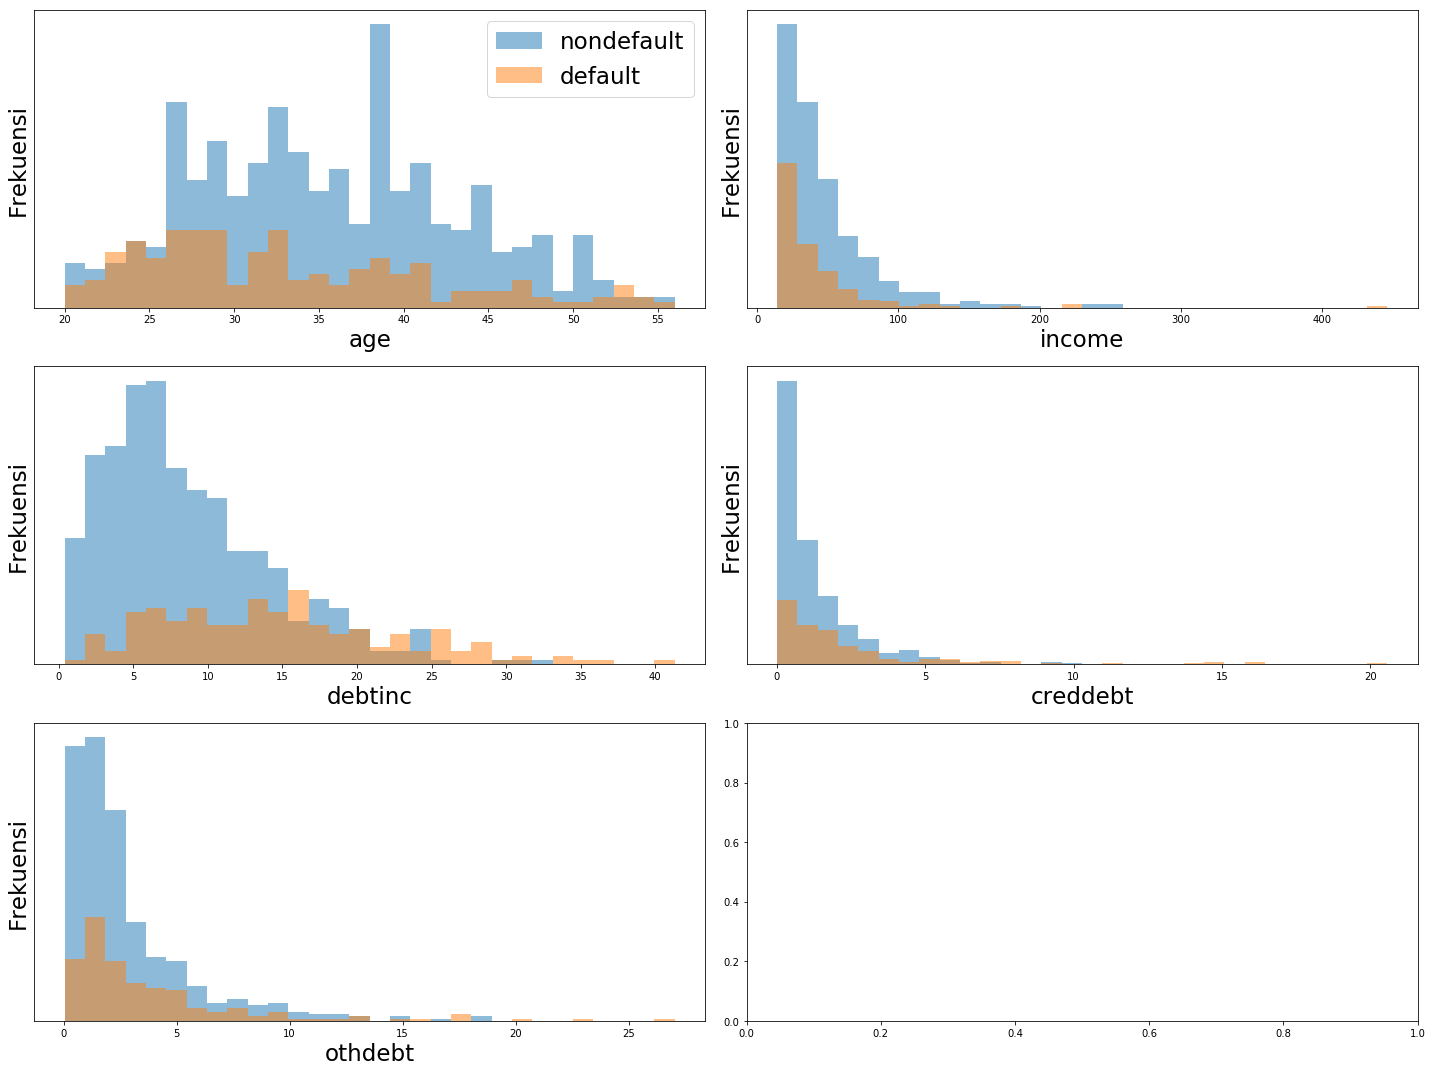

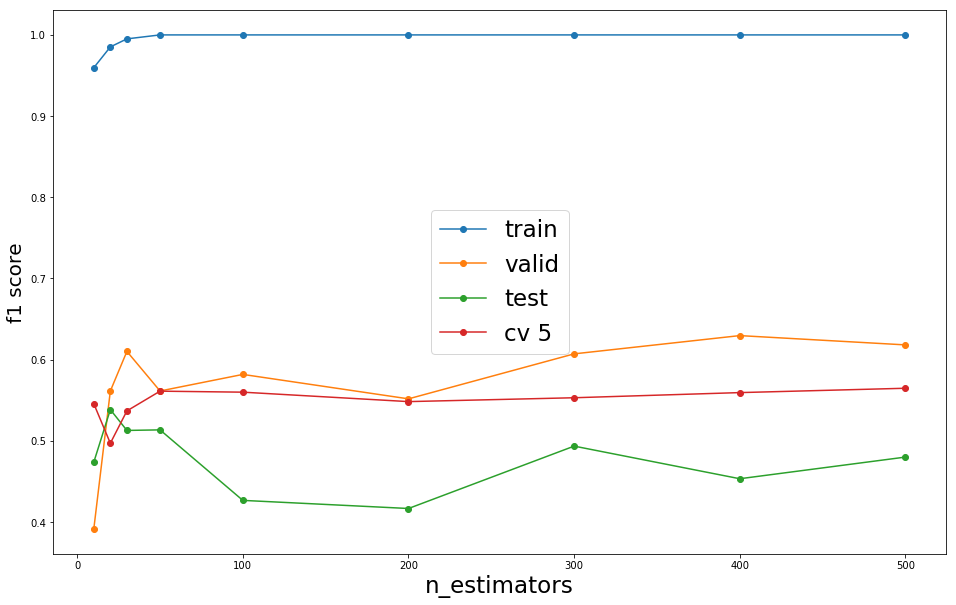

In [20]:
# mengatur ukuran gambar
plt.figure(figsize=(16,10))

# menumpuk beberapa grafik dalam satu jendela
plt.plot([10,20,30,50,100,200,300,400,500],train_score,'o-')
plt.plot([10,20,30,50,100,200,300,400,500],valid_score,'o-')
plt.plot([10,20,30,50,100,200,300,400,500],test_score,'o-')
plt.plot([10,20,30,50,100,200,300,400,500],cv_score,'o-')

# menambahkan keterangan
plt.legend(["train","valid","test","cv 5"],fontsize=23)

# mangatur label pada sumbu x
plt.xlabel("n_estimators",fontsize=23)

# mangatur label pada sumbu y
plt.ylabel("f1 score",fontsize=20)

plt.show()

# Memilih parameter tertentu berdasarkan validasi dan validasi silang : max_features

In [21]:
# menyediakan tempat untuk beberapa skor prediksi
test_score = []
train_score = []
valid_score = []
cv_score = []

# max features yang disiapkan
feature_range = range(3,11)

# memilih max features menggunakan looping dengan f1 skor
for feature in feature_range:
    hutan = RandomForestClassifier(max_depth=10,n_estimators=400,
                                   max_features=feature)
    hutan.fit(x_train,y_train)
    
    # menumpulkan skor untuk setiap max features
    valid_score.append(f1_score(y_val,hutan.predict(x_val)))
    test_score.append(f1_score(y_test,hutan.predict(x_test)))
    train_score.append(f1_score(y_train,hutan.predict(x_train)))
    cv_score.append(cross_val_score(hutan,x_trainval,y_trainval,
                                    scoring="f1",cv=skfold).mean())

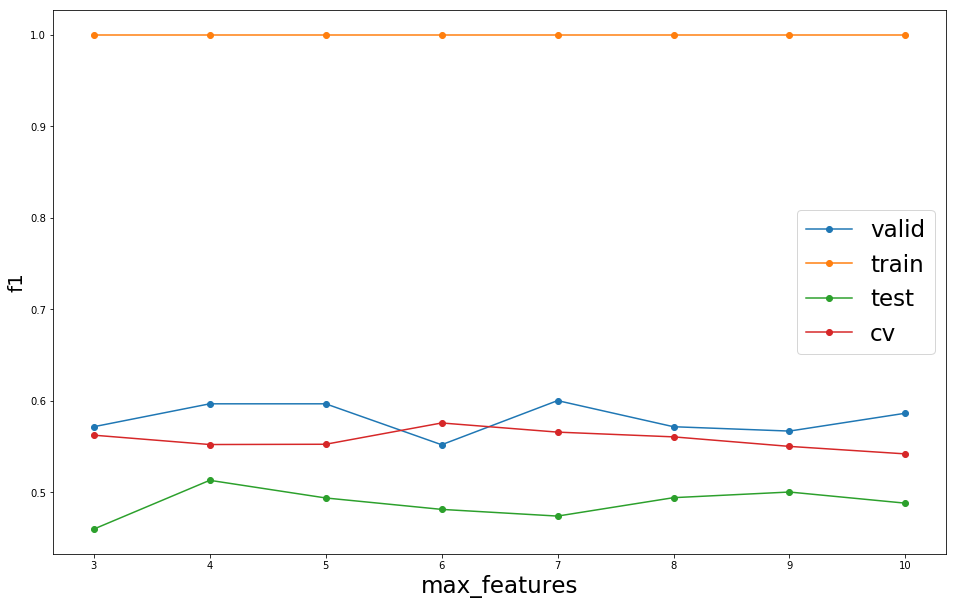

In [22]:
# mengatur ukuran gambar
plt.figure(figsize=(16,10))

# menumpuk beberapa grafik dalam satu jendela
plt.plot(feature_range,valid_score,'o-')
plt.plot(feature_range,train_score,'o-')
plt.plot(feature_range,test_score,'o-')
plt.plot(feature_range,cv_score,'o-')

# menambahkan keterangan
plt.legend(["valid","train","test","cv"],fontsize=23)

# mangatur label pada sumbu x
plt.xlabel("max_features",fontsize=23)

# mangatur label pada sumbu y
plt.ylabel("f1",fontsize=20)

plt.show()

# Memilih Parameter Tertentu Menggunakan Fungsi GridSearchCV (Tunning) :

In [23]:
# library
from sklearn.model_selection import GridSearchCV
from pprint import pprint

In [24]:
# daftar parameter yang disiapkan
n_estimators = [int(x) for x in np.linspace(400,500,3)]
max_features = [3,4,5]
max_depth = [4,5,6,7,12,15,20]

# parmeter yang disiapkan digabung dalam satu objek
param_grid = {
    'n_estimators':n_estimators
    ,'max_features':max_features
    ,'max_depth':max_depth
}
pprint(param_grid)

{'max_depth': [4, 5, 6, 7, 12, 15, 20],
 'max_features': [3, 4, 5],
 'n_estimators': [400, 450, 500]}


In [25]:
# program untuk tunning menggunakan fungsi GridSearchCV

# inisialisasi model 
hutan = RandomForestClassifier()

# perintah untuk melakukan validasi silang secara stratified
skf = StratifiedKFold(n_splits=4,random_state=0)

# fungsi GridSearchCV
grid_search_hutan = GridSearchCV(hutan,
                               #parameter grid   
                               param_grid=param_grid,
                               #beberapa ukuran yang ingin dimunculkan
                               scoring=['accuracy','recall','precision','f1'],
                               #ukuran prediksi yang digunakan untuk tunning
                               refit='f1',
                               # metode validasi silang
                               cv=skf)

In [26]:
# melakukan parameter tunning menggunakan data training
grid_search_hutan.fit(x_trainval,y_trainval)

GridSearchCV(cv=StratifiedKFold(n_splits=4, random_state=0, shuffle=False),
       error_score='raise',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'n_estimators': [400, 450, 500], 'max_features': [3, 4, 5], 'max_depth': [4, 5, 6, 7, 12, 15, 20]},
       pre_dispatch='2*n_jobs', refit='f1', return_train_score=True,
       scoring=['accuracy', 'recall', 'precision', 'f1'], verbose=0)

In [27]:
# memunculkan seluruh hasil fitting model
pd.DataFrame(grid_search_hutan.cv_results_)

,mean_fit_time,mean_score_time,mean_test_accuracy,mean_test_f1,mean_test_precision,mean_test_recall,mean_train_accuracy,mean_train_f1,mean_train_precision,mean_train_recall,...,std_fit_time,std_score_time,std_test_accuracy,std_test_f1,std_test_precision,std_test_recall,std_train_accuracy,std_train_f1,std_train_precision,std_train_recall
0,1.019999,0.220591,0.786667,0.428690,0.709223,0.314332,0.862855,0.663378,0.922422,0.518204,...,0.028501,0.007815,0.017973,0.081391,0.065830,0.083254,0.003184,0.011963,0.012134,0.015870
1,1.195660,0.248575,0.784762,0.434784,0.700590,0.321205,0.863496,0.666602,0.919165,0.523130,...,0.019407,0.004851,0.018316,0.060337,0.080975,0.062461,0.006956,0.017856,0.023548,0.017653
2,1.397207,0.305605,0.782857,0.418560,0.695732,0.306838,0.864131,0.666660,0.926409,0.520702,...,0.113770,0.017724,0.016809,0.078664,0.063357,0.080260,0.007219,0.017911,0.022611,0.015150
3,1.283813,0.279317,0.780952,0.435701,0.668052,0.328544,0.871748,0.698978,0.901398,0.571769,...,0.256946,0.070233,0.015856,0.060680,0.055915,0.064012,0.005765,0.019181,0.019094,0.029979
4,1.299506,0.274734,0.786667,0.446613,0.689488,0.335883,0.874286,0.704093,0.912280,0.574148,...,0.147492,0.018442,0.016486,0.069999,0.046057,0.074034,0.005800,0.018312,0.021869,0.027857
5,1.473908,0.302301,0.782857,0.429569,0.689417,0.321205,0.873650,0.704066,0.905330,0.576599,...,0.122843,0.021514,0.018458,0.078739,0.071915,0.083206,0.002788,0.011884,0.014932,0.020862
6,1.158913,0.232396,0.790476,0.470823,0.689035,0.365084,0.879999,0.724680,0.902881,0.605797,...,0.073646,0.011052,0.016153,0.071388,0.044443,0.084953,0.003344,0.011639,0.016597,0.020802
7,1.367218,0.267960,0.790476,0.471320,0.687864,0.365239,0.881268,0.726321,0.910019,0.605749,...,0.278020,0.028810,0.023814,0.081404,0.067861,0.088200,0.007515,0.024106,0.022009,0.037652
8,1.277092,0.302423,0.780952,0.452215,0.651890,0.350561,0.879999,0.723670,0.905624,0.603346,...,0.228818,0.067538,0.019739,0.063153,0.059178,0.066867,0.005523,0.018250,0.011778,0.028629
9,1.217198,0.253454,0.790476,0.460600,0.707259,0.350561,0.898413,0.767337,0.954042,0.642300,...,0.048991,0.022058,0.016831,0.073609,0.069644,0.081423,0.001798,0.006406,0.020501,0.016665


In [28]:
print("parameter terbaik : \n",grid_search_hutan.best_params_,"\n")
print("skor f1 terbaik : \n",grid_search_hutan.best_score_,"\n")
print("model terbaik : \n",grid_search_hutan.best_estimator_,"\n")

parameter terbaik : 
 {'max_depth': 15, 'max_features': 3, 'n_estimators': 450} 

skor f1 terbaik : 
 0.552184000786 

model terbaik : 
 RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=15, max_features=3, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=450, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False) 



____________________-

# MODEL AKHIR

____________________--

In [29]:
# model akhir berdasarkan fungsi GridSearchCV
hutan_final = grid_search_hutan.best_estimator_
hutan_final.fit(x_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=15, max_features=3, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=450, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [30]:
# menampilkan beberapa skor pada validasi akhir
print("akurasi \n",accuracy_score(y_test,hutan_final.predict(x_test)),"\n")
print("recall \n",recall_score(y_test,hutan_final.predict(x_test)),"\n")
print("precision \n",precision_score(y_test,hutan_final.predict(x_test)),"\n")
print("confusion matrix \n",confusion_matrix(y_test,hutan_final.predict(x_test)),"\n")
print("classification report \n",classification_report(y_test,hutan_final.predict(x_test)),"\n")

akurasi 
 0.782857142857 

recall 
 0.413043478261 

precision 
 0.633333333333 

confusion matrix 
 [[118  11]
 [ 27  19]] 

classification report 
              precision    recall  f1-score   support

          0       0.81      0.91      0.86       129
          1       0.63      0.41      0.50        46

avg / total       0.77      0.78      0.77       175
 



In [31]:
# membandingkan beberapa skor sebelum dan seusudah tunning parameter
print("classification report sebelum tunning (gugus data test) :\n","\n",
      classification_report(y_test,hutan0.predict(x_test)),"\n")
print("classification report setelah tunning (gugus data test):\n","\n",
      classification_report(y_test,hutan_final.predict(x_test)),"\n")

classification report sebelum tunning (gugus data test) :
 
              precision    recall  f1-score   support

          0       0.78      0.91      0.84       129
          1       0.54      0.28      0.37        46

avg / total       0.72      0.75      0.72       175
 

classification report setelah tunning (gugus data test):
 
              precision    recall  f1-score   support

          0       0.81      0.91      0.86       129
          1       0.63      0.41      0.50        46

avg / total       0.77      0.78      0.77       175
 



# Tingkat Kepentingan Peubah

In [32]:
list(hutan_final.feature_importances_)

[0.10290833383449385,
 0.12854807499647058,
 0.10826294695790277,
 0.10746974749812763,
 0.20315064850263762,
 0.16207264770019755,
 0.13161698462398796,
 0.017874487728034145,
 0.021210209509330582,
 0.011190407045442533,
 0.0053582041780428765,
 0.0003373074253320477]

In [33]:
# mengembangkan fungsi untuk membuat plot peubah penting
def plot_peubah_penting(model):
    n_features = len(list(hutan_final.feature_importances_))
    plt.barh(range(n_features),model.feature_importances_,align="center")
    plt.yticks(np.arange(n_features),FITUR_DUMMIES,fontsize=14)
    plt.xlabel("Tingkat Kepentingan Peubah",fontsize=23)
    plt.ylabel("Peubah",fontsize=23)
    plt.show()

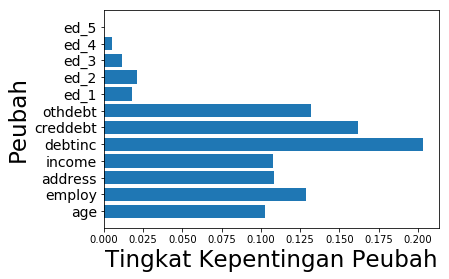

In [34]:
plot_peubah_penting(hutan_final)

_______________

# MENYIMPAN DAN MEMUAT MODEL

_________________________

In [35]:
# library untuk menyimpan dan memuat model
import pickle

In [36]:
#menyimpan model
filename = 'Model Tree.sav'
pickle.dump(hutan_final,open(filename,'wb'))

In [37]:
# memuat model
loaded_model = pickle.load(open(filename,'rb'))

In [38]:
# manimplkan skor pada model yang telah dimuat
print("Akurasi pada model yang telah dimuat",loaded_model.score(x_test,y_test))

Akurasi pada model yang telah dimuat 0.782857142857
